# Proyecto Final Tratamiento de Datos

Carlos Guerrero Valarezo

Maestria Ciberseguridad

In [1]:
#Versiones que tenemos instaladas en el sistema
# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# numpy
import numpy
print('numpy: %s' % numpy.__version__)
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas
print('pandas: %s' % pandas.__version__)
# statsmodels
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)
# tensorflow
import tensorflow
print('tensorflow: %s' % tensorflow.__version__)
# keras
import keras
print('keras: %s' % keras.__version__)
# cv2
import cv2
print('cv2: %s' % cv2.__version__)
# re
import re
print('re: %s' % re.__version__)

scipy: 1.7.3
numpy: 1.21.5
matplotlib: 3.5.3
pandas: 1.3.5
statsmodels: 0.13.2
sklearn: 1.0.2
tensorflow: 2.8.2
keras: 2.8.0
cv2: 4.6.0
re: 2.2.1


In [2]:
#Importacion de Librerias 
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import  Sequential,Input,Model
from tensorflow.python.keras import optimizers

#import
from keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout, Flatten #Para la red neuronal
from tensorflow.keras.layers import Conv2D, MaxPooling2D #para implementar las capas convolucionales
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU


In [3]:
#Cargar, Contar y Leer fotos de directorio
dirname = os.path.join(os.getcwd(), '../../../CarneDataset/train') #Path directorio de Fotos
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0
longitud, altura = 200, 200
tamano_pool = (2, 2)
print("Leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath) #cargará a memoria un arreglo de imágenes.
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #Convertir a escala de grises
            image = cv2.GaussianBlur(image, (3, 3), 0)   #Aplicar filtro gaussiano
            image = cv2.blur(image, (3, 3))   #Aplicar filtro difuminado
            image = cv2.medianBlur(image,5)
            image = cv2.resize(image,(longitud,altura))
            #image = filters.sobel(image)          
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirectorios:',sum(dircount))


Leyendo imagenes de  C:\Users\MGZ\Documents\GitHub\projectcgv\../../../CarneDataset/train\
C:\Users\MGZ\Documents\GitHub\projectcgv\../../../CarneDataset/train\CLASS_02 1
C:\Users\MGZ\Documents\GitHub\projectcgv\../../../CarneDataset/train\CLASS_03 62
C:\Users\MGZ\Documents\GitHub\projectcgv\../../../CarneDataset/train\CLASS_04 213
C:\Users\MGZ\Documents\GitHub\projectcgv\../../../CarneDataset/train\CLASS_05 105
C:\Users\MGZ\Documents\GitHub\projectcgv\../../../CarneDataset/train\CLASS_06 949
C:\Users\MGZ\Documents\GitHub\projectcgv\../../../CarneDataset/train\CLASS_07 37
C:\Users\MGZ\Documents\GitHub\projectcgv\../../../CarneDataset/train\CLASS_08 204
Directorios leidos: 7
Imagenes en cada directorio [63, 213, 105, 949, 37, 204, 62]
suma Total de imagenes en subdirectorios: 1633


In [4]:
#Creación de etiquetas
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

carnes_clases=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    carnes_clases.append(name[len(name)-1])
    indice=indice+1

y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy


classes = np.unique(y)
nClasses = len(classes)
print('Cantidad Total de Clases : ', nClasses)
print('Arreglo de clases creadas : ', classes)


Cantidad etiquetas creadas:  1633
0 CLASS_02
1 CLASS_03
2 CLASS_04
3 CLASS_05
4 CLASS_06
5 CLASS_07
6 CLASS_08
Cantidad Total de Clases :  7
Arreglo de clases creadas :  [0 1 2 3 4 5 6]


In [5]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2) #subdividimos los datos en 80/20 test y entrenamiento
print('Entrenamiento Data Shape : ', train_X.shape, train_Y.shape)
print('Pruebas Data Shape : ', test_X.shape, test_Y.shape)

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255. #Preprocesamos el valor de los pixeles y lo normalizamos para que tengan un valor entre 0 y 1
test_X = test_X / 255.  #Preprocesamos el valor de los pixeles y lo normalizamos para que tengan un valor entre 0 y 1

# CAmbiar etiquetas de categorical a one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Mostrar cambio de categoria etiqueta usando one-hot encoding
print('Etiqueta Original:', train_Y[0])
print('Despues de la conversion one-hot:', train_Y_one_hot[0])


train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)



Entrenamiento Data Shape :  (1306, 200, 200, 3) (1306,)
Pruebas Data Shape :  (327, 200, 200, 3) (327,)
Etiqueta Original: 5
Despues de la conversion one-hot: [0. 0. 0. 0. 0. 1. 0.]
(1044, 200, 200, 3) (262, 200, 200, 3) (1044, 7) (262, 7)


In [6]:
#Creacion de la Red Convolucional
INIT_LR = 1e-3
epochs = 20
batch_size = 128
filtros_convo=32
filtros_convo2=64
tamano_filtro=(3, 3)
tamano_filtro2=(2, 2)

carnes_model = Sequential() #crear contenedor del modelo, en donde progresivamente se irán añadiendo las capas de la Red Convolucional
carnes_model.add(Conv2D(filtros_convo, tamano_filtro,tamano_filtro,padding ="same", input_shape=(longitud, altura, 3), activation='linear'))
carnes_model.add(LeakyReLU(alpha=0.1))
carnes_model.add(MaxPooling2D(pool_size=tamano_pool))
carnes_model.add(Conv2D(filtros_convo2, tamano_filtro2, padding ="same"))
carnes_model.add(MaxPooling2D(pool_size=tamano_pool))
carnes_model.add(Flatten())
carnes_model.add(Dense(256, activation='linear'))
carnes_model.add(Dropout(0.5))
carnes_model.add(Dense(nClasses, activation='softmax'))
carnes_model.summary()
#sgd = SGD(learning_rate=0.1)
#carnes_model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,optimizer=tensorflow.keras.optimizers.Adagrad(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])
carnes_model.compile (loss='categorical_crossentropy',optimizer=tensorflow.keras.optimizers.Adagrad(learning_rate=INIT_LR, decay=INIT_LR / 100) ,metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 67, 67, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 67, 67, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 33, 33, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 33, 33, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 16384)             0

In [7]:
carnes_train_dropout = carnes_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))
# Guardamos la informacion para no volver a generar en el futuro
carnes_model.save('./modelo/modelo.h5')
carnes_model.save_weights('./modelo/pesos.h5')

Epoch 1/20
9/9 [==============================] - 4s 309ms/step - loss: 1.9322 - accuracy: 0.5086 - val_loss: 1.9130 - val_accuracy: 0.5840
Epoch 2/20
9/9 [==============================] - 2s 272ms/step - loss: 1.9016 - accuracy: 0.5785 - val_loss: 1.8818 - val_accuracy: 0.5840
Epoch 3/20
9/9 [==============================] - 2s 274ms/step - loss: 1.8704 - accuracy: 0.5785 - val_loss: 1.8495 - val_accuracy: 0.5840
Epoch 4/20
9/9 [==============================] - 3s 293ms/step - loss: 1.8359 - accuracy: 0.5785 - val_loss: 1.8109 - val_accuracy: 0.5840
Epoch 5/20
9/9 [==============================] - 3s 293ms/step - loss: 1.7940 - accuracy: 0.5785 - val_loss: 1.7629 - val_accuracy: 0.5840
Epoch 6/20
9/9 [==============================] - 3s 285ms/step - loss: 1.7442 - accuracy: 0.5785 - val_loss: 1.7062 - val_accuracy: 0.5840
Epoch 7/20
9/9 [==============================] - 3s 283ms/step - loss: 1.6856 - accuracy: 0.5785 - val_loss: 1.6418 - val_accuracy: 0.5840
Epoch 8/20
9/9 [====

11/11 [==============================] - 0s 21ms/step - loss: 1.3631 - accuracy: 0.5872
Test Red CNN:
Perdida: 1.3630503416061401
Exactitud: 0.5871559381484985


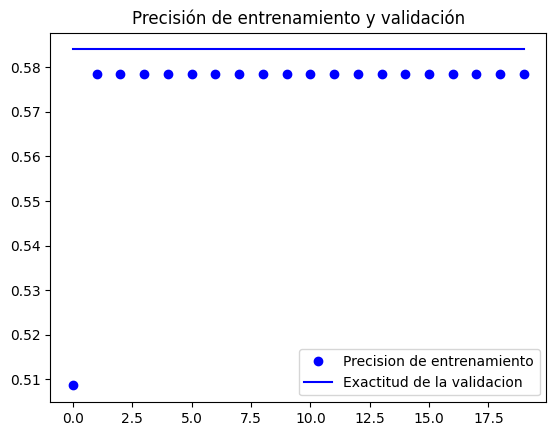

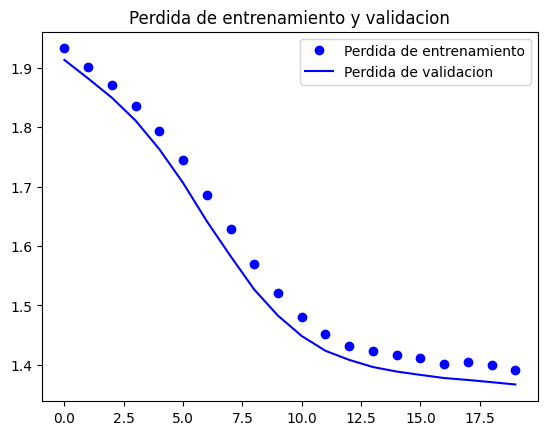

In [8]:
test_eval = carnes_model.evaluate(test_X, test_Y_one_hot, verbose=1)

 

print('Test Red CNN:')

print('Perdida:', test_eval[0])

print('Exactitud:', test_eval[1])

 

accuracy = carnes_train_dropout.history['accuracy']

val_accuracy = carnes_train_dropout.history['val_accuracy']

loss = carnes_train_dropout.history['loss']

val_loss = carnes_train_dropout.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Precision de entrenamiento')

plt.plot(epochs, val_accuracy, 'b', label='Exactitud de la validacion')

plt.title('Precisión de entrenamiento y validación')

plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Perdida de entrenamiento')

plt.plot(epochs, val_loss, 'b', label='Perdida de validacion')

plt.title('Perdida de entrenamiento y validacion')

plt.legend()

plt.show()

In [9]:
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model

longitud, altura = 200, 200
modelo = './modelo/modelo.h5'
pesos_modelo = './modelo/pesos.h5'
cnn = load_model(modelo)
cnn.load_weights(pesos_modelo)

def predict(file):
  x = load_img(file, target_size=(longitud, altura))
  x = img_to_array(x)
  x = np.expand_dims(x, axis=0)
  array = cnn.predict(x)
  result = array[0]
  answer = np.argmax(result)
  if answer == 0:
    print("Pertenece a CLASS_02")
  elif answer == 1:
    print("Pertenece a CLASS_03")
  elif answer == 2:
    print("Pertenece a CLASS_04")
  elif answer == 3:
    print("Pertenece a CLASS_05")
  elif answer == 4:
    print("Pertenece a CLASS_06")
  elif answer == 5:
    print("Pertenece a CLASS_07")
  elif answer == 6:
    print("Pertenece a CLASS_08")
  else :
    print("Pertenece a CLASS_01")
  return answer

predict ("14-CAPTURE_20220523_141530_080.png")
predict ("1.png")

Pertenece a CLASS_02
Pertenece a CLASS_02


0